# 1. 데이터 불러오기

크롤링한 파일들을 불러옵니다.

In [11]:
import pandas as pd

df = pd.read_csv('cafe_df_pipe.csv')
df = df.drop(['visitorreviewscore'],axis=1)
df

,name,latitude,longitude,address,review,savecount,flow_pop,bus_N,parking_N,cafe_N,bicycle_N,subway_N,school_N,dongcode,aver_sales,subway_d,store_N,rest_N,day_pop,night_pop
0,장꼬방,37.498366,127.023737,서울 서초구 강남대로61길 27,"1,020","7,000",7906,48,0,39,6,1,6,2120189,4.488364e+07,392.583206,97,65,681735.80,531999.19
1,시그니처랩 반포점,37.504573,127.006131,서울 서초구 신반포로 194 서울고속버스터미널 경부영동선 1층 승차홈 1번,"1,756","3,000",6537,16,41,26,8,1,0,2130299,3.885385e+07,108.052986,41,27,681735.80,531999.19
2,하프커피 파미에스테이션점,37.503286,127.004939,서울 서초구 사평대로 205 센트럴시티 파미에스테이션 2층 FP212호,"5,700","11,000",6537,19,41,25,7,1,0,2120167,5.062868e+07,169.472789,39,25,681735.80,531999.19
3,태양커피,37.479445,126.982683,서울 서초구 방배천로 32 송암빌딩 1층,543,"14,000",1095,24,188,64,7,1,4,2130274,2.311949e+08,335.934274,151,105,681735.80,531999.19
4,프릳츠 양재점,37.485357,127.032238,서울 서초구 강남대로37길 24-11,"4,077","26,000",2415,30,1,13,7,1,8,2120179,2.083186e+07,250.342270,24,16,681735.80,531999.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7348,오띠젤리,37.533222,126.989220,서울 용산구 녹사평대로 168-6 1층 O Tigelle,NaN,"3,000",730,17,2,34,6,2,2,2130061,9.366667e+07,275.100251,77,51,334466.27,297903.15
7349,키친아이,37.519382,126.975092,서울 용산구 이촌로 248 31동 상가 204호,80,800,1850,15,15,8,7,1,6,2130058,2.366561e+07,328.028054,7,4,334466.27,297903.15
7350,파치드 서울,37.535184,126.988561,서울 용산구 녹사평대로40다길 3-3 지하 1층,122,"13,000",427,19,2,31,5,1,4,2130061,9.366667e+07,173.968594,73,47,334466.27,297903.15
7351,위켄드베이커리 WKNDbakery,37.523651,126.961588,서울 용산구 한강대로7길 9-20 1층,55,800,5896,12,0,13,4,0,2,2110062,1.768129e+07,737.359706,26,20,334466.27,297903.15


# 2. 데이터 분석 및 전처리

결측치들을 제거해 줍니다.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7353 entries, 0 to 7352
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        7353 non-null   object 
 1   latitude    7353 non-null   float64
 2   longitude   7353 non-null   float64
 3   address     7353 non-null   object 
 4   review      7323 non-null   object 
 5   savecount   7353 non-null   object 
 6   flow_pop    7353 non-null   int64  
 7   bus_N       7353 non-null   int64  
 8   parking_N   7353 non-null   int64  
 9   cafe_N      7353 non-null   int64  
 10  bicycle_N   7353 non-null   int64  
 11  subway_N    7353 non-null   int64  
 12  school_N    7353 non-null   int64  
 13  dongcode    7353 non-null   int64  
 14  aver_sales  6244 non-null   float64
 15  subway_d    7353 non-null   float64
 16  store_N     7353 non-null   int64  
 17  rest_N      7353 non-null   int64  
 18  day_pop     7353 non-null   float64
 19  night_pop   7353 non-null  

In [14]:
df = df.dropna()

데이터 분석 후 이상치 제거

In [15]:
X = df[["flow_pop","bus_N","cafe_N","bicycle_N","subway_d","parking_N","day_pop","night_pop","school_N",'rest_N']]
y_data = df['aver_sales']
X['aver_sales']= y_data
X.describe()

C:\Users\Heejun\AppData\Local\Temp/ipykernel_15704/2826078881.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['aver_sales']= y_data


,flow_pop,bus_N,cafe_N,bicycle_N,subway_d,parking_N,day_pop,night_pop,school_N,rest_N,aver_sales
count,6219.000000,6219.000000,6219.000000,6219.000000,6219.000000,6219.000000,6.219000e+03,6219.000000,6219.000000,6219.000000,6.219000e+03
mean,3386.550892,23.226242,37.144075,6.140055,427.377652,46.976845,4.570077e+05,440044.270854,4.312430,42.883583,1.952658e+07
std,5120.877123,8.390255,25.633482,3.076044,313.713183,72.181944,1.739074e+05,138477.521400,3.561615,36.959885,2.460058e+07
min,90.000000,0.000000,1.000000,0.000000,12.207746,0.000000,2.549349e+05,228514.680000,0.000000,0.000000,2.090400e+04
25%,1038.500000,17.000000,17.000000,4.000000,213.400013,1.000000,3.677566e+05,351544.650000,2.000000,12.000000,7.053097e+06
50%,1998.000000,23.000000,30.000000,6.000000,357.178066,13.000000,3.974187e+05,416897.230000,4.000000,31.000000,1.287210e+07
75%,4099.500000,28.000000,55.000000,8.000000,540.663678,69.000000,4.850542e+05,526003.020000,6.000000,67.000000,2.508865e+07
max,96214.000000,60.000000,131.000000,22.000000,2920.736824,520.000000,1.039798e+06,771733.170000,20.000000,158.000000,2.311949e+08


In [16]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

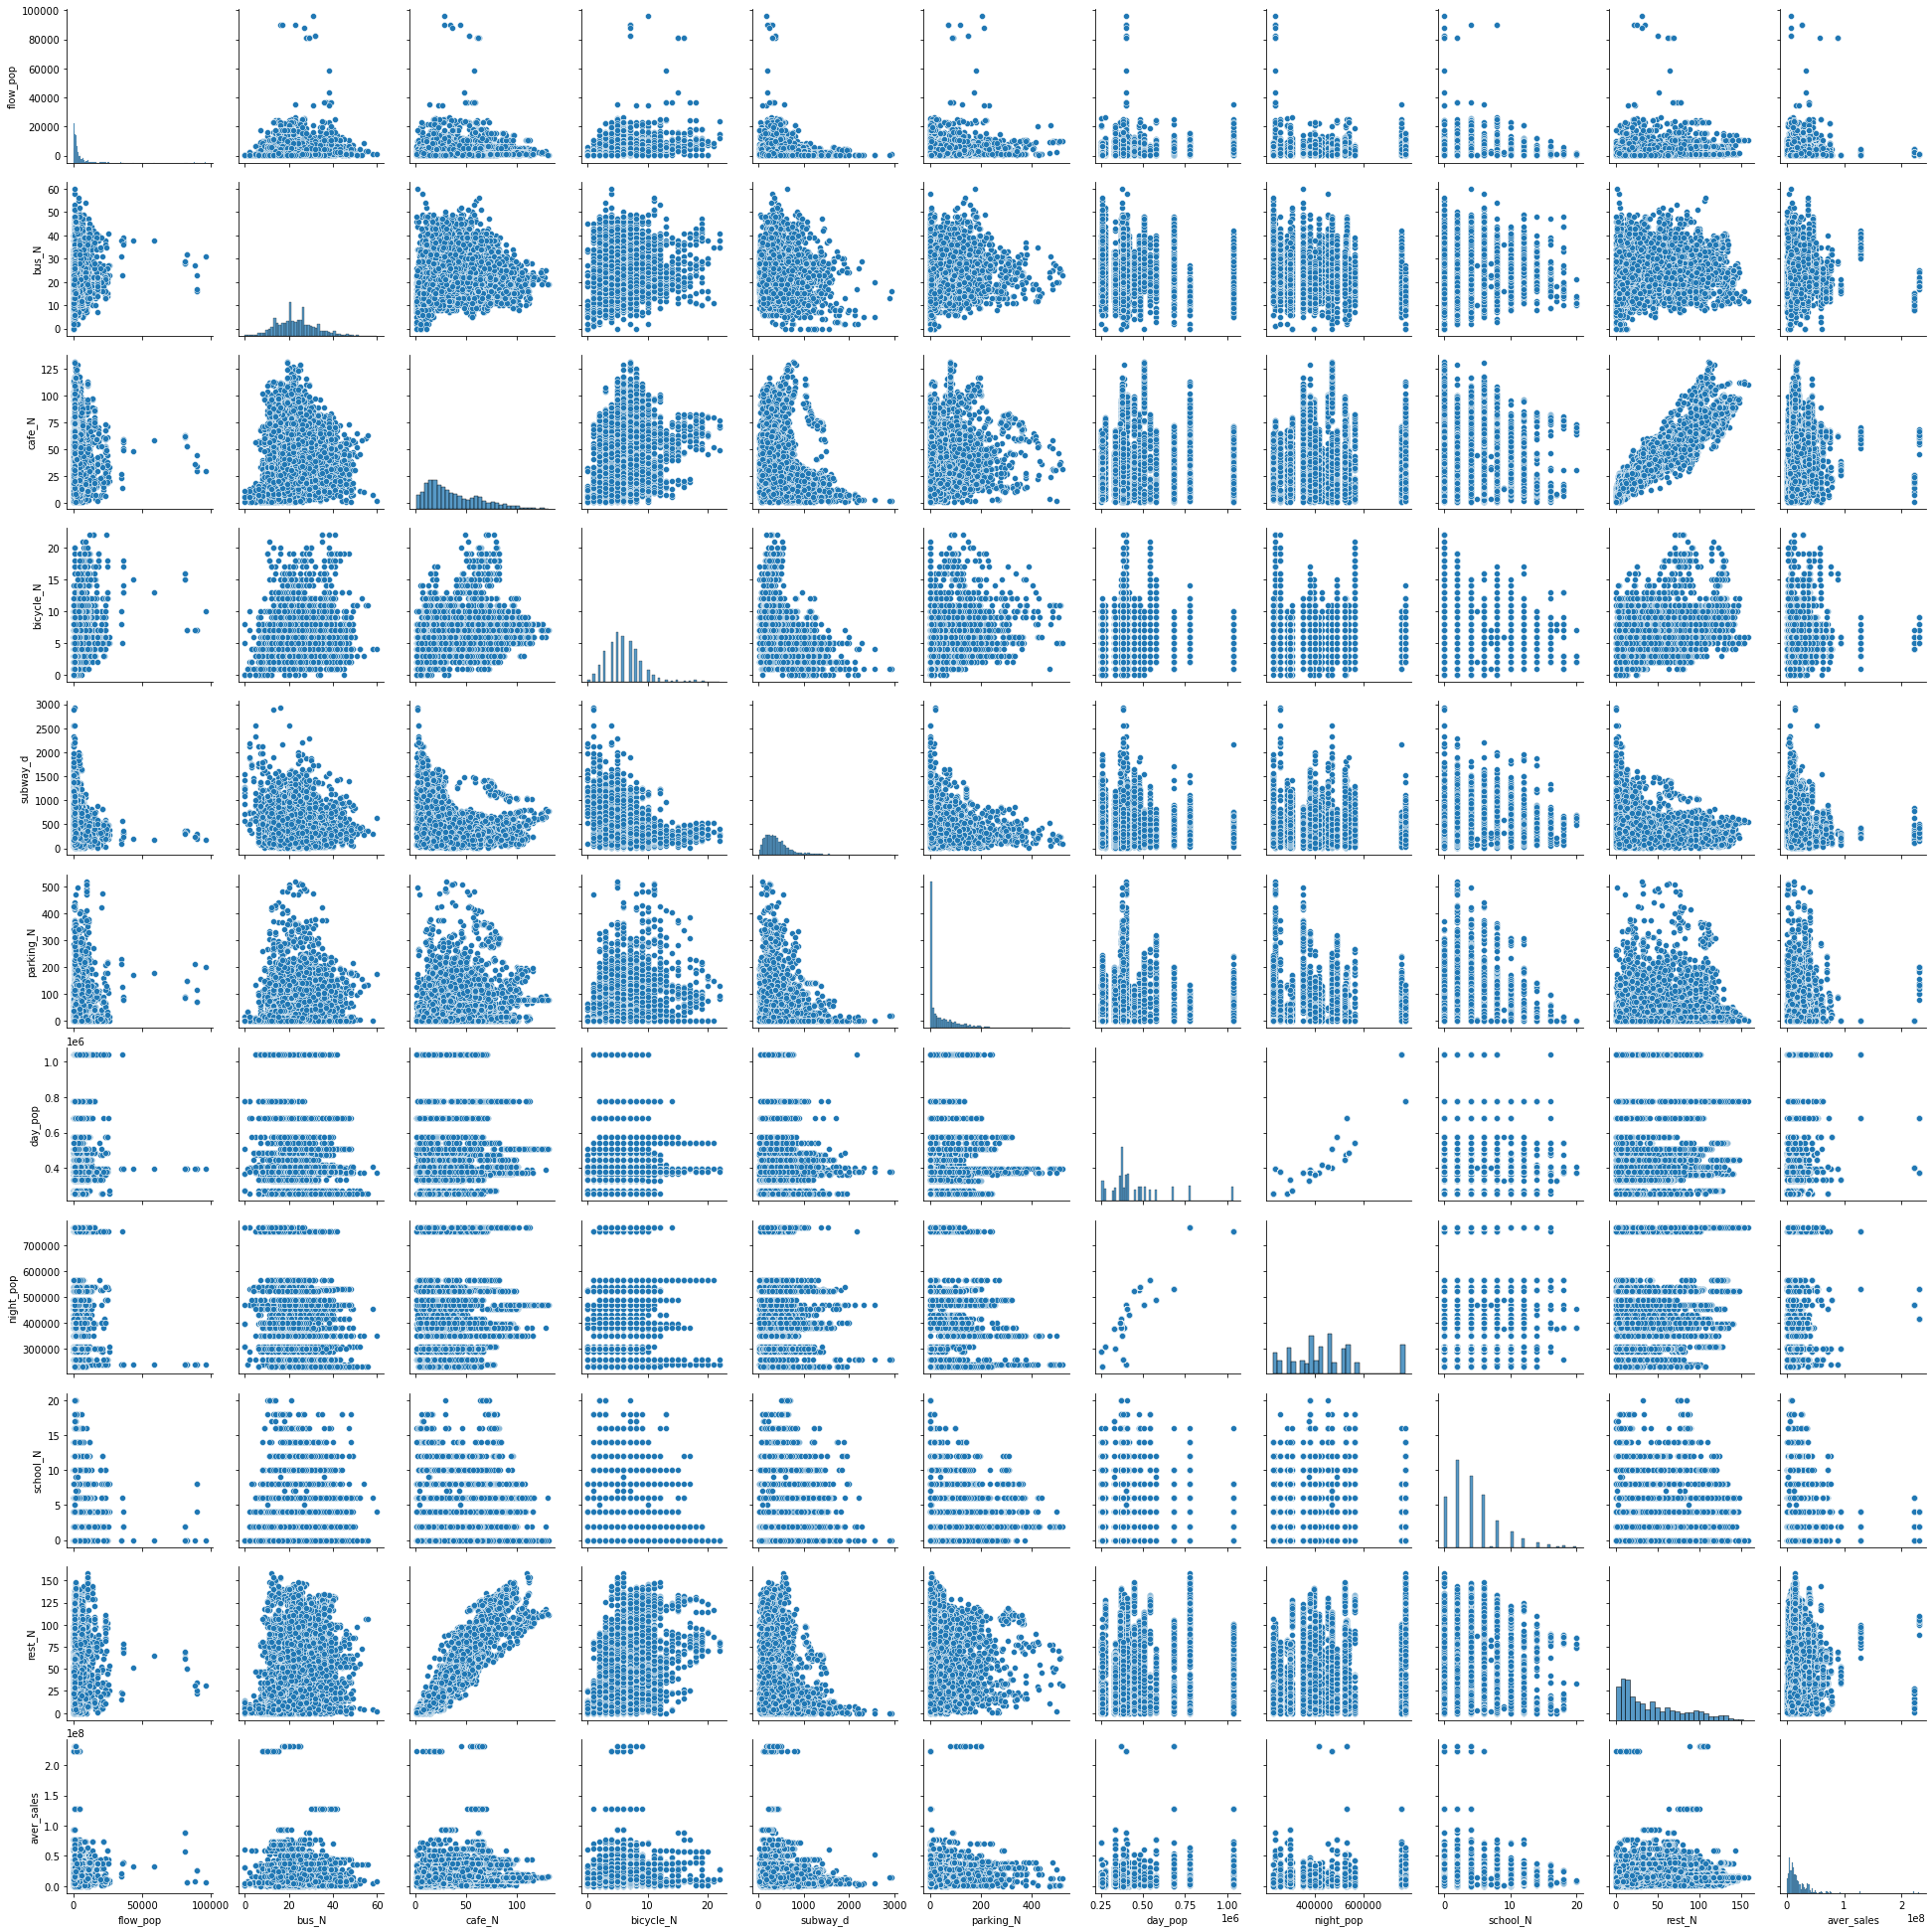

In [17]:
sns.pairplot(data=X)

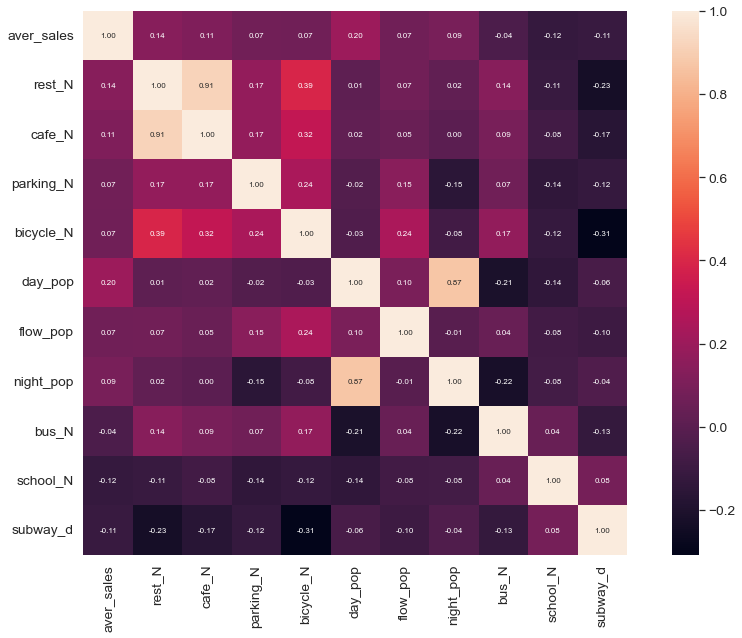

In [18]:
k = 12 #number of variables for heatmap
corrmat = X.corr(method='spearman') # correlation 전체 변수에 대해서 계산
cols = corrmat.nlargest(k, 'aver_sales').index # nlargest : Return this many descending sorted values
cm = np.corrcoef(X[cols].values.T) # correlation 특정 컬럼에 대해서
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(16, 10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

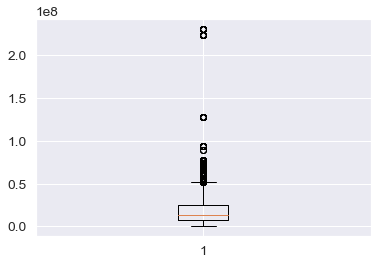

In [19]:
plt.boxplot(X.aver_sales)
plt.show()

(Q1 – 1.5 * IQR) 보다 작거나 (Q3 + 1.5 * IQR) 보다 큰 데이터는 이상치로 처리한다.

In [20]:
q1=X['aver_sales'].quantile(0.25)
q3=X['aver_sales'].quantile(0.75)
iqr=q3-q1

condition=X['aver_sales']>q3+1.5*iqr
a=X[condition].index

In [21]:
X.drop(a,inplace=True)

D:\anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


{'whiskers': [<matplotlib.lines.Line2D at 0x15c586e7190>,
 'caps': [<matplotlib.lines.Line2D at 0x15c586e78b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15c586d7dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x15c586e7fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15c586f23a0>],
 'means': []}

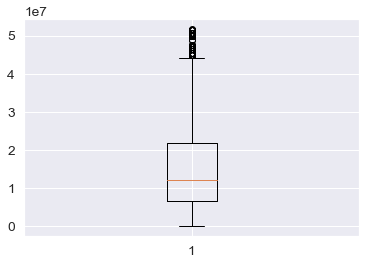

In [22]:
plt.boxplot(X.aver_sales)

<AxesSubplot:>

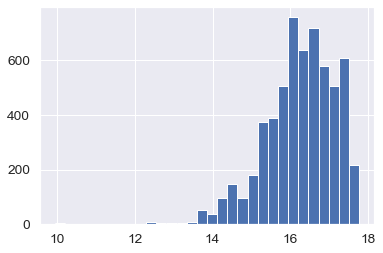

In [23]:
np.log1p(X['aver_sales']).hist(bins=30)

In [24]:
X = X.loc[np.log1p(X['aver_sales']) > 13]

In [25]:
X

,flow_pop,bus_N,cafe_N,bicycle_N,subway_d,parking_N,day_pop,night_pop,school_N,rest_N,aver_sales
0,7906,48,39,6,392.583206,0,681735.80,531999.19,6,65,4.488364e+07
1,6537,16,26,8,108.052986,41,681735.80,531999.19,0,27,3.885385e+07
2,6537,19,25,7,169.472789,41,681735.80,531999.19,0,25,5.062868e+07
4,2415,30,13,7,250.342270,1,681735.80,531999.19,8,16,2.083186e+07
5,926,20,58,6,435.468282,200,681735.80,531999.19,4,97,5.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...
7345,15613,28,18,8,160.196995,40,334466.27,297903.15,2,12,5.065796e+07
7346,748,15,20,4,483.764666,1,334466.27,297903.15,0,29,1.463713e+07
7347,748,16,62,9,285.643233,2,334466.27,297903.15,2,62,1.598126e+07
7349,1850,15,8,7,328.028054,15,334466.27,297903.15,6,4,2.366561e+07


In [26]:
y_data = X['aver_sales']
X = X[["flow_pop","bus_N","cafe_N","bicycle_N","subway_d","parking_N","day_pop","night_pop","school_N",'rest_N']]

# 3. 데이터 분리

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y_data, train_size=0.8,test_size=0.2,random_state=42)

# 4. 모델 구축 후 학습 진행

In [28]:
# 1. 다중선형회귀
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred = lr.predict(X_test)

In [30]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.1779614333609687
0.16545400167960111


In [31]:
sqrt(mean_squared_error(y_pred,y_test))

10727171.775082136

In [36]:
from sklearn.linear_model import ElasticNet, Lasso , BayesianRidge, LassoLarsIC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.svm import SVR

In [37]:
#Validation fuction
n_folds = 10

def  rmse_cv(model):
    kf = KFold(n_folds, shuffle=True ,random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values,y_train,scoring='neg_mean_squared_error',cv=kf))
    return(rmse)
def  r2_cv(model):
    kf = KFold(n_folds, shuffle=True ,random_state=42).get_n_splits(X_train.values)
    r2= cross_val_score(model, X_train.values,y_train,scoring='r2',cv=kf)
    return(r2)

Lasso Regrassion

- 첫번째는 제약 조건을 통해 일반화된 모형을 찾는다는 것이다.
- 두번째는 가중치들이 0이 되게 함으로써 그에 해당하는 특성들을 제외해준다. 결과적으로 모델에서 가장 중요한 특성이 무엇인지 알게되는 등 모델 해석력이 좋아진다.

In [38]:
lasso = Lasso(random_state=3)

In [39]:
score = rmse_cv(lasso)
score2 = r2_cv(lasso)
print("\nLasso score: {:.4f}({:.4f})\n".format(score.mean(),score.std()))
print("\nLasso score: {:.4f}({:.4f})\n".format(score2.mean(),score2.std()))


Lasso score: 10624463.5277(381510.2980)


Lasso score: 0.1727(0.0364)



In [40]:
ENet = ElasticNet(random_state=3)

In [41]:
score = rmse_cv(ENet)
score2 = r2_cv(ENet)
print("\nElasticNet score: {:.4f}({:.4f})\n".format(score.mean(),score.std()))
print("\nElasticNet score: {:.4f}({:.4f})\n".format(score2.mean(),score2.std()))


ElasticNet score: 10624298.8157(380720.9027)


ElasticNet score: 0.1727(0.0362)



In [42]:
model_gb = GradientBoostingRegressor()

In [43]:
score = rmse_cv(model_gb)
score2 = r2_cv(model_gb)
print("\nGradient Boosting score: {:.4f}({:.4f})\n".format(score.mean(),score.std()))
print("\nGradient Boosting score: {:.4f}({:.4f})\n".format(score2.mean(),score2.std()))


Gradient Boosting score: 8979787.8901(295618.7774)


Gradient Boosting score: 0.4088(0.0280)



In [44]:
model_xgb = XGBRegressor()

In [45]:
score = rmse_cv(model_xgb)
score2 = r2_cv(model_xgb)
print("\nXGBosost score: {:.4f}({:.4f})\n".format(score.mean(),score.std()))
print("\nXGBosost score: {:.4f}({:.4f})\n".format(score2.mean(),score2.std()))


XGBosost score: 7011120.9157(398011.8286)


XGBosost score: 0.6388(0.0365)



In [46]:
model_svr = SVR()

In [47]:
score = rmse_cv(model_svr)
score2 = r2_cv(model_svr)
print("\nSVR score: {:.4f}({:.4f})\n".format(score.mean(),score.std()))
print("\nSVR score: {:.4f}({:.4f})\n".format(score2.mean(),score2.std()))


SVR score: 12187188.4625(315947.5331)


SVR score: -0.0884(0.0190)



In [48]:
model_lgb = lgb.LGBMRegressor()

In [49]:
score = rmse_cv(model_lgb)
score2 = r2_cv(model_lgb)
print("\nLGBM score: {:.4f}({:.4f})\n".format(score.mean(),score.std()))
print("\nLGBM score: {:.4f}({:.4f})\n".format(score2.mean(),score2.std()))


LGBM score: 7288899.1327(327334.0084)


LGBM score: 0.6098(0.0328)



In [50]:
regr = RandomForestRegressor()

In [51]:
score = rmse_cv(regr)
score2 = r2_cv(regr)
print("\nRFRegressor score: {:.4f}({:.4f})\n".format(score.mean(),score.std()))
print("\nRFRegressor score: {:.4f}({:.4f})\n".format(score2.mean(),score2.std()))


RFRegressor score: 6480653.5390(328750.0640)


RFRegressor score: 0.6892(0.0298)



In [37]:
regr?

# 5.  모델 예측

In [52]:
model_lgb.fit(X_train,y_train)
lgb_train_pred = model_lgb.predict(X_train)
print(model_lgb.score(X_train,y_train))
print(model_lgb.score(X_test,y_test))

0.7945575554082055
0.5823948415603618


In [53]:
model_xgb.fit(X_train,y_train)
xgb_train_pred = model_xgb.predict(X_train)
print(model_xgb.score(X_train,y_train))
print(model_xgb.score(X_test,y_test))

0.9442426908390946
0.6343609447543025


In [54]:
regr.fit(X_train,y_train)
print(regr.score(X_train,y_train))
print(regr.score(X_test,y_test))

0.9578573026999638
0.6708887220386344


# 6.  하이퍼 파라미터 조절

In [55]:
from sklearn.model_selection import GridSearchCV
# XGB
param_xgb = {"max_depth": [5,6,7],
              "min_child_weight" : [10,15,20],
              "n_estimators": [300,400,500]
              }    
# LGB                        
param_lgb = {"learning_rate" : [0.1],
             "max_depth" : [8,9,10],
             "num_leaves" : [300,400],
             "n_estimators" : [700,800,900],
              }
# Random Forest
param_regr = {'n_estimators': [500,1000,1500], 
              'max_features': [2, 4, 6, 8],
              'bootstrap': [False]
                        }
model_xgb = XGBRegressor()
model_lgb = lgb.LGBMRegressor()
model_regr = RandomForestRegressor()
gscv_xgb = GridSearchCV (estimator = model_xgb, param_grid = param_xgb, scoring ='r2', cv = 3, refit=True, n_jobs=-1, verbose=2)
gscv_lgb = GridSearchCV (estimator = model_lgb, param_grid = param_lgb, scoring ='r2', cv = 3, refit=True, n_jobs=-1, verbose=2)
gscv_regr = GridSearchCV (estimator = model_regr, param_grid = param_regr, scoring ='r2', cv = 3, refit=True, n_jobs=-1, verbose=2)
gscv_xgb.fit(X_train, y_train)
gscv_lgb.fit(X_train, y_train)
gscv_regr.fit(X_train, y_train)

print("="*30)
print('XGB 파라미터: ', gscv_xgb.best_params_)
print('XGB 예측 정확도: {:.4f}'.format(gscv_xgb.best_score_))
print("="*30)
print('LGB 파라미터: ', gscv_lgb.best_params_)
print('LGB 예측 정확도: {:.4f}'.format(gscv_lgb.best_score_))
print("="*30)
print('RFR 파라미터: ', gscv_regr.best_params_)
print('RFR 예측 정확도: {:.4f}'.format(gscv_regr.best_score_))
print("="*30)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
XGB 파라미터:  {'max_depth': 7, 'min_child_weight': 10, 'n_estimators': 300}
XGB 예측 정확도: 0.6134
LGB 파라미터:  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 900, 'num_leaves': 300}
LGB 예측 정확도: 0.6316
RFR 파라미터:  {'bootstrap': False, 'max_features': 2, 'n_estimators': 1500}
RFR 예측 정확도: 0.6742


In [60]:
model = RandomForestRegressor(n_estimators=500,bootstrap=False,max_features=2,random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_features=2, n_estimators=500,
                      random_state=42)

In [64]:
y_pred = model.predict(X_test)

In [66]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9999999418123818
0.7096245572917574


In [65]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 6327614.870721


In [67]:
y_pred = model.predict(X_test)

<BarContainer object of 10 artists>

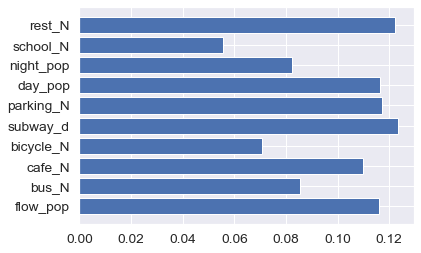

In [68]:
plt.barh(X.columns, model.feature_importances_, align='center')

In [69]:
model2 = xgb.XGBRegressor(max_depth = 7 , min_child_weight=20 , n_estimators = 400)
model2.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=20,
             missing=nan, monotone_constraints='()', n_estimators=400, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [70]:
print(model2.score(X_train,y_train))
print(model2.score(X_test,y_test))

0.9880530479882914
0.6466792735622805


In [71]:
model3 = lgb.LGBMRegressor(learning_rate=0.1 , max_depth=10 , n_estimators = 900,num_leaves = 400)
model3.fit(X_train,y_train)

LGBMRegressor(max_depth=10, n_estimators=900, num_leaves=400)

In [72]:
print(model3.score(X_train,y_train))
print(model3.score(X_test,y_test))

0.9957820089820507
0.6775743584669034


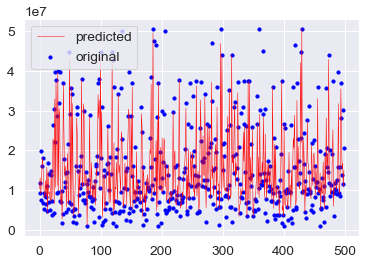

In [73]:
x_ax = range(len(y_test))
plt.scatter(x_ax[:500], y_test[:500], s=10, color="blue", label="original")
plt.plot(x_ax[:500], y_pred[:500], lw=0.5, color="red", label="predicted")
plt.legend()
plt.show()

# 7. 모델 사용

In [76]:
df_v = pd.read_csv("rs_dataframe.csv")

In [77]:
X_v = df_v[["flow_pop","bus_N","cafe_N","bicycle_N","subway_d","parking_N","day_pop","night_pop","school_N",'rest_N']]

In [78]:
df_v['score']=model.predict(X_v)

(array([ 34., 331., 437., 419., 308., 149.,  84.,  25.,   7.,   3.]),
 array([ 4983277.98247036,  8201019.76518286, 11418761.54789536,
        14636503.33060786, 17854245.11332036, 21071986.89603286,
        24289728.67874536, 27507470.46145786, 30725212.24417036,
        33942954.02688286, 37160695.80959536]),
 <BarContainer object of 10 artists>)

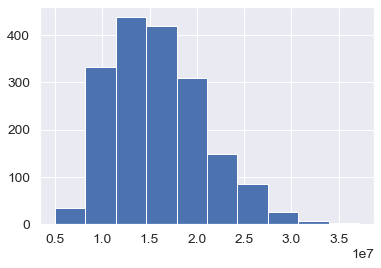

In [79]:
plt.hist(df_v['score'])

In [80]:
df_v

,Unnamed: 0,tradeTypeName,rentPrc,dealOrWarrantPrc,area2,floorInfo,direction,latitude,longitude,flow_pop,...,cafe_N,bicycle_N,subway_N,subway_d,school_N,store_N,rest_N,day_pop,night_pop,score
0,0,월세,800,1억,151,1/10,남향,37.577010,126.896961,316,...,4,10,2,356.834399,2,11,5,508151.67,471457.29,1.678874e+07
1,1,월세,340,"4,000",78,1/3,서향,37.577000,126.896647,316,...,4,9,2,384.224754,2,10,4,508151.67,471457.29,1.650382e+07
2,2,매매,0,"12억 5,000",42,1/22,북향,37.544876,126.947963,4339,...,12,6,1,333.870357,10,25,15,508151.67,471457.29,1.380668e+07
3,3,월세,290,"3,000",154,2/4,북향,37.577464,126.893779,316,...,2,9,1,408.841842,2,8,2,508151.67,471457.29,1.316523e+07
4,4,월세,300,"7,000",71,B1/37,남향,37.540049,126.945477,1900,...,1,4,1,66.325748,4,19,12,508151.67,471457.29,1.167850e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,1792,월세,180,"2,000",80,1/5,서향,37.555477,126.913090,867,...,27,3,1,276.451336,8,53,30,508151.67,471457.29,1.843285e+07
1793,1793,매매,0,64억,505,1/14,남향,37.553712,126.954696,1978,...,5,6,2,187.257005,8,9,6,508151.67,471457.29,1.054729e+07
1794,1794,월세,140,"2,000",45,1/3,북향,37.541508,126.955320,7980,...,4,5,1,431.196142,2,9,2,508151.67,471457.29,1.701431e+07
1795,1795,월세,200,"2,000",39,B1/2,남동향,37.554436,126.927052,1471,...,28,4,1,340.016502,2,49,25,508151.67,471457.29,1.360661e+07


In [81]:
df_v=df_v.sort_values('score',ascending=False)

In [82]:
Rank=[]
for i in range(1,len(df_v)+1):    
    Rank.append(i)
df_v['Score_Rank']=Rank
df_v

,Unnamed: 0,tradeTypeName,rentPrc,dealOrWarrantPrc,area2,floorInfo,direction,latitude,longitude,flow_pop,...,bicycle_N,subway_N,subway_d,school_N,store_N,rest_N,day_pop,night_pop,score,Score_Rank
1791,1791,월세,190,"3,000",42,1/2,남서향,37.541873,126.951962,2883,...,6,1,240.733934,2,20,11,508151.67,471457.29,3.716070e+07,1
1299,1299,월세,270,"6,000",33,1/1,북서향,37.541950,126.951782,4384,...,6,1,230.560781,2,20,11,508151.67,471457.29,3.452361e+07,2
1129,1129,월세,185,"3,000",32,2/3,북서향,37.542002,126.951786,4384,...,6,1,224.820866,2,20,11,508151.67,471457.29,3.446427e+07,3
794,794,월세,420,"5,000",93,1/1,북향,37.549232,126.916241,6583,...,8,1,222.063509,2,99,67,508151.67,471457.29,3.226587e+07,4
506,506,월세,170,"2,000",62,3/5,남향,37.555494,126.909844,910,...,4,1,69.190692,2,84,41,508151.67,471457.29,3.214732e+07,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,777,매매,0,4억,28,2/2,남동향,37.572792,126.889704,3941,...,3,0,919.974055,2,1,0,508151.67,471457.29,6.961278e+06,1793
980,980,월세,300,"3,000",165,B1/3,남향,37.557523,126.904687,935,...,2,1,498.904254,2,73,32,508151.67,471457.29,6.746761e+06,1794
1790,1790,월세,510,"5,000",119,1/5,북서향,37.552491,126.913816,3589,...,7,1,336.767122,2,73,47,508151.67,471457.29,5.649647e+06,1795
303,303,월세,100,"1,000",17,1/3,남서향,37.557177,126.904837,902,...,2,1,475.213980,2,77,33,508151.67,471457.29,5.552238e+06,1796


In [83]:
df_v=df_v.sort_values('가성비',ascending=False)

KeyError: '가성비'

In [111]:
Rank=[]
for i in range(1,len(df_v)+1):    
    Rank.append(i)
df_v['가성비_Rank']=Rank
df_v

,tradeTypeName,rentPrc,dealOrWarrantPrc,area2,floor_estate,floor_buliding,latitude,longitude,flow_pop,bus_N,...,rest_N,day_pop,night_pop,score,2nPrc,평당가격,가성비,가성비_Rank,Score_Rank,Total_Rank
41,월세,260,10000.0,299,-2,9,37.552331,126.916981,21404,39,...,59,508151.67,471457.29,2.402234e+07,1.624000e+08,5.431438e+05,0.039408,1,130,356.2
212,월세,120,1000.0,150,-1,4,37.553387,126.917939,7109,40,...,48,508151.67,471457.29,1.698778e+07,3.880000e+07,2.586667e+05,0.027483,2,800,1010.2
983,월세,30,300.0,55,1,3,37.554772,126.960736,5040,26,...,0,508151.67,471457.29,1.062193e+07,1.020000e+07,1.854545e+05,0.027176,3,1880,3265.6
868,월세,180,2000.0,76,-1,3,37.548477,126.919583,21404,28,...,64,508151.67,471457.29,1.498831e+07,6.320000e+07,8.315789e+05,0.025739,4,1147,2985.0
59,월세,380,4000.0,148,2,6,37.552189,126.916416,21404,39,...,59,508151.67,471457.29,2.123419e+07,1.312000e+08,8.864865e+05,0.024145,5,304,416.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,월세,400,3000.0,9,1,2,37.554117,126.922338,943,38,...,40,508151.67,471457.29,1.199263e+07,1.260000e+08,1.400000e+07,0.000067,2188,1598,6501.6
1733,월세,1550,21000.0,56,3,3,37.564850,126.923310,662,23,...,98,508151.67,471457.29,1.655490e+07,5.820000e+08,1.039286e+07,0.000064,2189,890,5190.6
1284,월세,4340,100000.0,143,1,15,37.557212,126.923674,847,31,...,52,508151.67,471457.29,2.140523e+07,2.041600e+09,1.427692e+07,0.000059,2190,285,4058.2
2064,월세,3000,50000.0,62,1,2,37.554256,126.922427,943,38,...,39,508151.67,471457.29,1.275421e+07,1.220000e+09,1.967742e+07,0.000048,2191,1495,6074.8


In [112]:
Rank = []
for i in range(len(df_v)):
    s = df_v.Score_Rank.values[i] *0.8 + df_v.가성비_Rank.values[i] * 0.2
    Rank.append(s)
df_v['Total_Rank'] = Rank
df_v

,tradeTypeName,rentPrc,dealOrWarrantPrc,area2,floor_estate,floor_buliding,latitude,longitude,flow_pop,bus_N,...,rest_N,day_pop,night_pop,score,2nPrc,평당가격,가성비,가성비_Rank,Score_Rank,Total_Rank
41,월세,260,10000.0,299,-2,9,37.552331,126.916981,21404,39,...,59,508151.67,471457.29,2.402234e+07,1.624000e+08,5.431438e+05,0.039408,1,130,104.2
212,월세,120,1000.0,150,-1,4,37.553387,126.917939,7109,40,...,48,508151.67,471457.29,1.698778e+07,3.880000e+07,2.586667e+05,0.027483,2,800,640.4
983,월세,30,300.0,55,1,3,37.554772,126.960736,5040,26,...,0,508151.67,471457.29,1.062193e+07,1.020000e+07,1.854545e+05,0.027176,3,1880,1504.6
868,월세,180,2000.0,76,-1,3,37.548477,126.919583,21404,28,...,64,508151.67,471457.29,1.498831e+07,6.320000e+07,8.315789e+05,0.025739,4,1147,918.4
59,월세,380,4000.0,148,2,6,37.552189,126.916416,21404,39,...,59,508151.67,471457.29,2.123419e+07,1.312000e+08,8.864865e+05,0.024145,5,304,244.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,월세,400,3000.0,9,1,2,37.554117,126.922338,943,38,...,40,508151.67,471457.29,1.199263e+07,1.260000e+08,1.400000e+07,0.000067,2188,1598,1716.0
1733,월세,1550,21000.0,56,3,3,37.564850,126.923310,662,23,...,98,508151.67,471457.29,1.655490e+07,5.820000e+08,1.039286e+07,0.000064,2189,890,1149.8
1284,월세,4340,100000.0,143,1,15,37.557212,126.923674,847,31,...,52,508151.67,471457.29,2.140523e+07,2.041600e+09,1.427692e+07,0.000059,2190,285,666.0
2064,월세,3000,50000.0,62,1,2,37.554256,126.922427,943,38,...,39,508151.67,471457.29,1.275421e+07,1.220000e+09,1.967742e+07,0.000048,2191,1495,1634.2


In [113]:
df_v=df_v.sort_values('Total_Rank',ascending=True)

In [114]:
df_v = df_v[['tradeTypeName', 'rentPrc', 'dealOrWarrantPrc', 'area2', 'floor_estate',
       'floor_buliding', 'latitude', 'longitude', 'flow_pop', 'bus_N',
       'parking_N', 'cafe_N', 'bicycle_N', 'subway_N', 'subway_d', 'school_N',
       'rest_N', 'day_pop', 'night_pop', 'score', '2nPrc', '평당가격',
       '가성비', '가성비_Rank', 'Score_Rank', 'Total_Rank']]

In [115]:
df_v

,tradeTypeName,rentPrc,dealOrWarrantPrc,area2,floor_estate,floor_buliding,latitude,longitude,flow_pop,bus_N,...,rest_N,day_pop,night_pop,score,2nPrc,평당가격,가성비,가성비_Rank,Score_Rank,Total_Rank
78,월세,440,5000.0,176,3,5,37.550111,126.920849,7825,32,...,69,508151.67,471457.29,2.932449e+07,155600000.0,8.840909e+05,0.008851,75,13,25.4
16,월세,160,1500.0,66,-1,4,37.551508,126.919298,7825,37,...,75,508151.67,471457.29,2.809519e+07,53400000.0,8.090909e+05,0.009671,58,22,29.2
29,월세,360,5000.0,142,2,5,37.549060,126.916351,6583,32,...,67,508151.67,471457.29,3.250769e+07,136400000.0,9.605634e+05,0.006853,156,2,32.8
106,월세,500,5000.0,190,5,7,37.550733,126.920204,7825,34,...,73,508151.67,471457.29,2.826484e+07,170000000.0,8.947368e+05,0.008746,81,21,33.0
17,월세,200,2000.0,76,2,4,37.551508,126.919298,7825,37,...,75,508151.67,471457.29,2.809519e+07,68000000.0,8.947368e+05,0.008746,80,23,34.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,월세,230,3000.0,29,1,2,37.557018,126.953744,910,25,...,2,508151.67,471457.29,7.842860e+06,85200000.0,2.937931e+06,0.000310,2071,2167,2147.8
2042,월세,150,5000.0,18,1,9,37.556685,126.954666,969,22,...,2,508151.67,471457.29,8.160550e+06,86000000.0,4.777778e+06,0.000203,2143,2152,2150.2
2187,월세,200,2000.0,20,1,14,37.557018,126.953744,910,25,...,2,508151.67,471457.29,7.842860e+06,68000000.0,3.400000e+06,0.000268,2103,2166,2153.4
2190,월세,250,3000.0,33,1,14,37.556171,126.941065,660,37,...,92,508151.67,471457.29,3.772599e+06,90000000.0,2.727273e+06,0.000242,2121,2192,2177.8


In [149]:
import time
now = time
df_v.to_csv(f'score_{now.strftime("%Y%m%d")}.csv',encoding='cp949',index=False)